# Basic settings of AlphaRaw

Let's start from an mzML example:

In [1]:
from alpharaw import register_all_readers
from alpharaw.ms_data_base import ms_reader_provider

register_all_readers()
mzml_reader = ms_reader_provider.get_reader("mzml")
mzml_reader.load_raw("../../nbs_tests/test_data/small.pwiz.1.1.mzML")

In [2]:
mzml_reader.spectrum_df

,spec_idx,peak_start_idx,peak_stop_idx,rt,precursor_mz,precursor_charge,isolation_lower_mz,isolation_upper_mz,ms_level
0,0,0,10739,0.004935,-1.00,0,-1.00,-1.00,1
1,1,10739,25554,0.007897,-1.00,0,-1.00,-1.00,1
2,2,25554,26039,0.011218,810.79,0,810.29,811.29,2
3,3,26039,27045,0.022838,837.34,0,836.84,837.84,2
4,4,27045,27882,0.034925,725.36,0,724.86,725.86,2
5,5,27882,28532,0.048620,558.87,0,558.37,559.37,2
6,6,28532,29294,0.061923,812.33,0,811.83,812.83,2
7,7,29294,37374,0.075015,-1.00,0,-1.00,-1.00,1
8,8,37374,54285,0.077788,-1.00,0,-1.00,-1.00,1
9,9,54285,54837,0.081203,810.75,0,810.25,811.25,2


The `spectrum_df` format is shown as table (dataframe) above. It contains several required columns for proteomics:

- `spec_idx`: the index of a spectrum in the raw file, it starts from zero. For thermo data, its value is the `scan number - 1`.
- `peak_start_idx`: the start row index of peaks in `peak_df` (see `mzml_reader.peak_df` below) for the spectrum.
- `peak_stop_idx`: the stop row index of peaks in `peak_df` (see `mzml_reader.peak_df` below) for the spectrum.
- `rt`: retention time in minutes. We will use `rt_sec` for retention time in seconds in alphaX ecosystem.
- `precursor_mz`: the precursor m/z of the given MS2 scans. For an MS1 scan, the value is always -1. For DIA MS2, the default value will be the isolation center of the MS2. And for DDA MS2, `precursor_mz` may refer to the mono-isotope m/z of the precursor when `precursor_charge` is not 0, otherwise isolation center.
- `precursor_charge`: For DIA, this value is always 0. For DDA, it can be nonzero when the mono-isotope m/z is determined.
- `isolation_lower_mz`: the lower (or left) m/z boundary of the isolation window.
- `isolation_upper_mz`: the upper (or right) m/z boundary of the isolation window.
- `ms_level`: MS1, MS2, ... it starts from one.

In [3]:
mzml_reader.peak_df

,mz,intensity
0,204.759583,1422.173584
1,204.759842,3215.493164
2,204.760101,3887.355957
3,204.760345,2843.165527
4,204.760605,582.906738
...,...,...
197238,1547.776733,1.261027
197239,1723.519287,1.640921
197240,1724.323975,1.251971
197241,1724.991333,5.156138


The `peak_df` looks like the table above, it only contains `mz` and `intensity` columns.

The relation between `spectrum_df` and `peak_df` is show in the following figure. This format is very flexable for spectrum selection without losing the connection between spectra and peaks, for instance, selecting spectra within RT in range of [10:10.5].

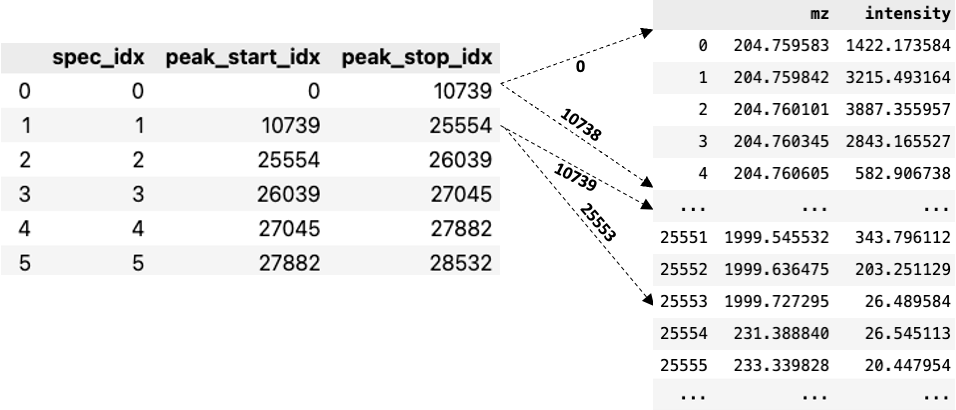

In [4]:
from IPython.display import Image
Image(filename='spectrum_peak_df_connection.png')

AlphaRaw currently supports a list of MS data formats, including thermo raw (`alpharaw.thermo.ThermoRawData`) sciex wiff (`alpharaw.sciex.SciexWiffData`), and mzML (`alpharaw.mzml.MzMLReader`). Thermo raw data is better supported as we can extract auxiliary information for a spectrum in `alpharaw.thermo.ThermoRawData` by using thermo's RawFileReader.

We provided a factory method called `ms_reader_provider` in `alpharaw.ms_data_base`, and `alpharaw.register_all_readers()` will register the AlphaRaw's built-in MS readers with names, as shown below:

In [5]:
ms_reader_provider.ms_reader_dict

{'alpharaw': alpharaw.ms_data_base.MSData_HDF,
 'raw.hdf': alpharaw.ms_data_base.MSData_HDF,
 'alpharaw_hdf': alpharaw.ms_data_base.MSData_HDF,
 'hdf': alpharaw.ms_data_base.MSData_HDF,
 'hdf5': alpharaw.ms_data_base.MSData_HDF,
 'mzml': alpharaw.mzml.MzMLReader,
 'mgf': alpharaw.legacy_msdata.mgf.MGFReader,
 'sciex': alpharaw.sciex.SciexWiffData,
 'sciex_wiff': alpharaw.sciex.SciexWiffData,
 'sciex_raw': alpharaw.sciex.SciexWiffData,
 'thermo': alpharaw.thermo.ThermoRawData,
 'thermo_raw': alpharaw.thermo.ThermoRawData}

## MS data storage

The `spectrum_df` and `peak_df` will be saved into HDF5 (https://www.hdfgroup.org/solutions/hdf5/, https://docs.h5py.org/en/stable/) file by using readers' common API `save_hdf()`. The `spectrum_df` will be saved into `ms_data/spectrum_df`, and `peak_df` into `ms_data/peak_df`. We can use readers' `load_hdf()` method to load these two dataframes into the reader object.

```
# Save hdf
ms_reader.save_hdf(hdf_path)

# Load hdf
ms_reader.load_hdf(hdf_path)
```

If developers know how to use h5py package, it is also easy to directly load each column from the HDF5 file as a numpy array, and then re-construct `spectrum_df` and `peak_df` if necessary.

HDF5 files can be partially loaded or operated in memory-mapped mode for a RAM-limited environment, but this is not the topic of this tutorial.